<a href="https://colab.research.google.com/github/SajawalHassan/payment_classification_ml/blob/main/payment_classification_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Dataset

## 1.1 Downloading dataset

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

--2023-02-27 11:56:50--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘adult.data’

adult.data          100%[===================>]   3.79M  --.-KB/s    in 0.1s    

2023-02-27 11:56:51 (32.8 MB/s) - ‘adult.data’ saved [3974305/3974305]



## 1.2 Loading and cleaning data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("adult.data")
df.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "maritial-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "greater-or-less-50K"]
df.sample(n=5)

,age,workclass,fnlwgt,education,education-num,maritial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,greater-or-less-50K
9633,51,Private,251487,7th-8th,4,Widowed,Machine-op-inspct,Not-in-family,Amer-Indian-Eskimo,Female,0,0,40,United-States,<=50K
7553,34,?,133861,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,25,United-States,<=50K
9837,37,Private,249720,Bachelors,13,Never-married,Adm-clerical,Unmarried,Black,Female,0,0,27,United-States,<=50K
25491,58,Private,374108,Some-college,10,Divorced,Prof-specialty,Unmarried,White,Female,0,0,40,United-States,<=50K
8265,46,Private,328216,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,40,United-States,>50K


In [ ]:
df["greater-or-less-50K"] = df["greater-or-less-50K"].str.strip() # Removing whitespace
df["greater-or-less-50K"] = (df["greater-or-less-50K"] == ">50K").astype(int)
df.head()

,age,workclass,fnlwgt,education,education-num,maritial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,greater-or-less-50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


### 1.2.1 Converting columns into numbers


In [ ]:
def change_rows_into_numbers(df, rows, col_num):
  column = df.iloc[:, col_num] # Find column

  # Create a dictionary with the value of each item being the index and it's key being the value of the item at that index in the row
  numerical_version_of_column = {value: index for index, value in enumerate(rows)}

  # Replace the columns old values with new
  df.iloc[:, col_num] = column.replace(numerical_version_of_column)

  return df

#### 1.2.1.1 Workclass

In [ ]:
df["workclass"].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [ ]:
df = df[df["workclass"] != " ?"]

In [ ]:
df["workclass"].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [ ]:
df = change_rows_into_numbers(df, df["workclass"].unique(), 1)
df.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,age,workclass,fnlwgt,education,education-num,maritial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,greater-or-less-50K
0,50,0,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,1,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,1,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,1,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,1,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [ ]:
df["workclass"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

#### 1.2.1.2 Education

In [ ]:
df["education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [ ]:
df = change_rows_into_numbers(df, df["education"].unique(), 3)
df.head()

,age,workclass,fnlwgt,education,education-num,maritial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,greater-or-less-50K
0,50,0,83311,0,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,1,215646,1,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,1,234721,2,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,1,338409,0,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,1,284582,3,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [ ]:
df["education"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

#### 1.2.1.3 Maritial-status

In [ ]:
df["maritial-status"].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [ ]:
df = change_rows_into_numbers(df, df["maritial-status"].unique(), 5)
df.head()

,age,workclass,fnlwgt,education,education-num,maritial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,greater-or-less-50K
0,50,0,83311,0,13,0,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,1,215646,1,9,1,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,1,234721,2,7,0,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,1,338409,0,13,0,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,1,284582,3,14,0,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [ ]:
df["maritial-status"].unique()

array([0, 1, 2, 3, 4, 5, 6])

#### 1.2.1.4 Occupation

In [ ]:
df["occupation"].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv', ' ?'], dtype=object)

In [ ]:
df = df[df["occupation"] != " ?"]

In [ ]:
df["occupation"].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [ ]:
df = change_rows_into_numbers(df, df["occupation"].unique(), 6)
df.head()

,age,workclass,fnlwgt,education,education-num,maritial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,greater-or-less-50K
0,50,0,83311,0,13,0,0,Husband,White,Male,0,0,13,United-States,0
1,38,1,215646,1,9,1,1,Not-in-family,White,Male,0,0,40,United-States,0
2,53,1,234721,2,7,0,1,Husband,Black,Male,0,0,40,United-States,0
3,28,1,338409,0,13,0,2,Wife,Black,Female,0,0,40,Cuba,0
4,37,1,284582,3,14,0,0,Wife,White,Female,0,0,40,United-States,0


In [ ]:
df["occupation"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

#### 1.2.1.5 Relationship

In [ ]:
df["relationship"].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [ ]:
df = change_rows_into_numbers(df, df["relationship"].unique(), 7)
df.head()

,age,workclass,fnlwgt,education,education-num,maritial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,greater-or-less-50K
0,50,0,83311,0,13,0,0,0,White,Male,0,0,13,United-States,0
1,38,1,215646,1,9,1,1,1,White,Male,0,0,40,United-States,0
2,53,1,234721,2,7,0,1,0,Black,Male,0,0,40,United-States,0
3,28,1,338409,0,13,0,2,2,Black,Female,0,0,40,Cuba,0
4,37,1,284582,3,14,0,0,2,White,Female,0,0,40,United-States,0


In [ ]:
df["relationship"].unique()

array([0, 1, 2, 3, 4, 5])

#### 1.2.1.6 Race

In [ ]:
df["race"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [ ]:
df = change_rows_into_numbers(df, df["race"].unique(), 8)
df.head()

,age,workclass,fnlwgt,education,education-num,maritial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,greater-or-less-50K
0,50,0,83311,0,13,0,0,0,0,Male,0,0,13,United-States,0
1,38,1,215646,1,9,1,1,1,0,Male,0,0,40,United-States,0
2,53,1,234721,2,7,0,1,0,1,Male,0,0,40,United-States,0
3,28,1,338409,0,13,0,2,2,1,Female,0,0,40,Cuba,0
4,37,1,284582,3,14,0,0,2,0,Female,0,0,40,United-States,0


In [ ]:
df["race"].unique()

array([0, 1, 2, 3, 4])

#### 1.2.1.7 Sex


In [ ]:
df["sex"].unique()

array([' Male', ' Female'], dtype=object)

In [ ]:
df = change_rows_into_numbers(df, df["sex"].unique(), 9)
df.head()

,age,workclass,fnlwgt,education,education-num,maritial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,greater-or-less-50K
0,50,0,83311,0,13,0,0,0,0,0,0,0,13,United-States,0
1,38,1,215646,1,9,1,1,1,0,0,0,0,40,United-States,0
2,53,1,234721,2,7,0,1,0,1,0,0,0,40,United-States,0
3,28,1,338409,0,13,0,2,2,1,1,0,0,40,Cuba,0
4,37,1,284582,3,14,0,0,2,0,1,0,0,40,United-States,0


In [ ]:
df["sex"].unique()

array([0, 1])

#### 1.2.1.8 Native Country

In [ ]:
df["native-country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [ ]:
df = change_rows_into_numbers(df, df["native-country"].unique(), -2)
df.head()

,age,workclass,fnlwgt,education,education-num,maritial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,greater-or-less-50K
0,50,0,83311,0,13,0,0,0,0,0,0,0,13,0,0
1,38,1,215646,1,9,1,1,1,0,0,0,0,40,0,0
2,53,1,234721,2,7,0,1,0,1,0,0,0,40,0,0
3,28,1,338409,0,13,0,2,2,1,1,0,0,40,1,0
4,37,1,284582,3,14,0,0,2,0,1,0,0,40,0,0


In [ ]:
df["native-country"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41])

## 1.3 Train, validation and test datasets

In [ ]:
for column in df.columns:
  plt.hist(df[df["greater-or-less-50K"] == 1][column], color="blue", density=True, label="Greater than 50K")
  plt.hist(df[df["greater-or-less-50K"] == 0][column], color="red", density=True, alpha=0.7, label="Less than 50K")
  plt.ylabel("Probability")
  plt.xlabel(column)
  plt.title(column)
  plt.legend()
  plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
def get_xy(df):
  # Get x and y
  X = df[df.columns[:-1]].values
  y = df[df.columns[-1]].values

  # Scale dataset
  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  # Reshape y into 2d array (To be able to hstack them)
  y = np.reshape(y, (-1, 1))

  # Horizontally stack the two arrays
  data = np.hstack((X, y))

  return data, X, y

In [ ]:
# Splitting dataset into train (60%), valid (20%) and test (20%)
train, valid, test = np.split(df.sample(frac=1), [int(0.6 * len(df)), int(0.8 * len(df))])

In [ ]:
_, X_train, y_train = get_xy(train)
_, X_valid, y_valid = get_xy(valid)
_, X_test, y_test = get_xy(test)

In [ ]:
X_train

array([[-0.33668909, -1.20073931, -0.31200333, ...,  3.46884069,
         1.59405893, -0.25705403],
       [ 0.12071204, -0.32466546,  0.31013734, ..., -0.22060341,
         0.3373033 , -0.25705403],
       [ 2.1790171 , -1.20073931,  2.30832126, ..., -0.22060341,
        -3.09782875, -0.25705403],
       ...,
       [-0.18422205, -0.32466546,  1.6448076 , ..., -0.22060341,
         0.3373033 , -0.25705403],
       [ 1.03551429,  3.17962995,  0.2025542 , ..., -0.22060341,
         1.59405893, -0.25705403],
       [-1.25149134, -0.32466546,  3.48091549, ..., -0.22060341,
        -0.50053379,  0.71291151]])

# 2. Algorithms

In [ ]:
from sklearn.metrics import classification_report

## 2.1 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression() # Initialize logistic regression model
lg_model.fit(X_train, np.reshape(y_train, -1)) # Train our model

LogisticRegression()

In [ ]:
lg_y_pred = lg_model.predict(X_test)
print(classification_report(y_test, lg_y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      4636
           1       0.72      0.55      0.62      1508

    accuracy                           0.84      6144
   macro avg       0.79      0.74      0.76      6144
weighted avg       0.83      0.84      0.83      6144



## 2.2 KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, np.reshape(y_train, -1))

KNeighborsClassifier()

In [ ]:
knn_y_pred = knn_model.predict(X_test)

In [ ]:
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      4636
           1       0.65      0.59      0.62      1508

    accuracy                           0.82      6144
   macro avg       0.76      0.74      0.75      6144
weighted avg       0.82      0.82      0.82      6144



## 2.3 Neural Networks

In [ ]:
import tensorflow as tf

In [ ]:
def plot_loss(history):
  plt.plot(history.history["val_loss"], label="Validation loss")
  plt.title("Loss over time")
  plt.grid()
  plt.xlabel("Epochs")
  plt.ylabel("Loss over time")
  plt.legend()
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history["val_accuracy"], label="Validation accuracy")
  plt.title("Accuracy over time")
  plt.grid()
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy over time")
  plt.legend()
  plt.show()

In [ ]:
def create_nn_model(num_nodes, dropout_rate, input_shape, learning_rate, loss_function, metrics):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation="relu", input_shape=input_shape),

      tf.keras.layers.Dense(num_nodes, activation="relu"),
      tf.keras.layers.Dropout(dropout_rate),

      tf.keras.layers.Dense(num_nodes, activation="relu"),
      tf.keras.layers.Dropout(dropout_rate),

      tf.keras.layers.Dense(num_nodes, activation="relu"),
      tf.keras.layers.Dropout(dropout_rate),

      tf.keras.layers.Dense(num_nodes, activation="relu"),
      tf.keras.layers.Dropout(dropout_rate),

      tf.keras.layers.Dense(num_nodes, activation="relu"),
      tf.keras.layers.Dropout(dropout_rate),

      tf.keras.layers.Dense(num_nodes, activation="relu"),
      tf.keras.layers.Dropout(dropout_rate),

      tf.keras.layers.Dense(num_nodes, activation="relu"),
      tf.keras.layers.Dropout(dropout_rate),

      tf.keras.layers.Dense(num_nodes, activation="relu"),
      tf.keras.layers.Dropout(dropout_rate),

      tf.keras.layers.Dense(1, activation="sigmoid")
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss=loss_function, metrics=metrics)


  return nn_model

In [ ]:
new_nn_model = create_nn_model(512, 0.5, (14,), 0.001, tf.keras.losses.binary_crossentropy, ["accuracy"])
new_history = new_nn_model.fit(X_train, y_train, 16, 10, validation_data=(X_valid, y_valid))

Epoch 1/10
1152/1152 [==============================] - 43s 36ms/step - loss: 0.4404 - accuracy: 0.7986 - val_loss: 0.3642 - val_accuracy: 0.8317
Epoch 2/10
1152/1152 [==============================] - 39s 34ms/step - loss: 0.4173 - accuracy: 0.8179 - val_loss: 0.3652 - val_accuracy: 0.8336
Epoch 3/10
1152/1152 [==============================] - 40s 35ms/step - loss: 0.4118 - accuracy: 0.8252 - val_loss: 0.3552 - val_accuracy: 0.8354
Epoch 4/10
1152/1152 [==============================] - 39s 33ms/step - loss: 0.3951 - accuracy: 0.8254 - val_loss: 0.3725 - val_accuracy: 0.8330
Epoch 5/10
1152/1152 [==============================] - 40s 35ms/step - loss: 0.3991 - accuracy: 0.8220 - val_loss: 0.3911 - val_accuracy: 0.8011
Epoch 6/10
1152/1152 [==============================] - 39s 34ms/step - loss: 0.3913 - accuracy: 0.8211 - val_loss: 0.3904 - val_accuracy: 0.7959
Epoch 7/10
1152/1152 [==============================] - 38s 33ms/step - loss: 0.4022 - accuracy: 0.8243 - val_loss: 0.3787 -

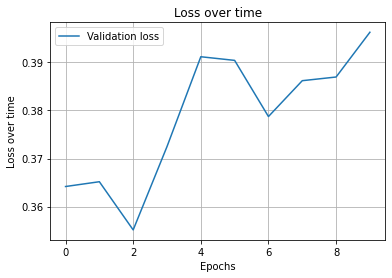

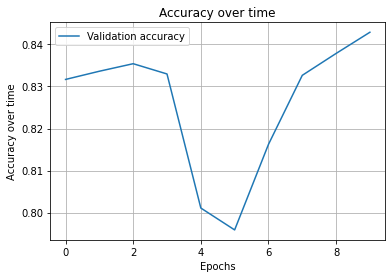

In [ ]:
plot_loss(new_history)
plot_accuracy(new_history)

In [ ]:
nn_y_pred = new_nn_model.predict(X_test)
nn_y_pred = (nn_y_pred > 0.5).astype(int)
print(classification_report(y_test, nn_y_pred))

192/192 [==============================] - 2s 11ms/step
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      4636
           1       0.67      0.66      0.67      1508

    accuracy                           0.84      6144
   macro avg       0.78      0.78      0.78      6144
weighted avg       0.84      0.84      0.84      6144



## 2.4 Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt_y_pred = dt_model.predict(X_test)
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      4636
           1       0.59      0.61      0.60      1508

    accuracy                           0.80      6144
   macro avg       0.73      0.73      0.73      6144
weighted avg       0.80      0.80      0.80      6144

